<a href="https://colab.research.google.com/github/mrasw/classification/blob/main/FP_KK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/My Drive/KK/FP/archive (4)/"

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import os, os.path
from sklearn.preprocessing import OrdinalEncoder

# Data Train

In [3]:
df = pd.read_csv(path+"fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df = df.drop(['Unnamed: 0','trans_date_trans_time','cc_num','first','last','street','lat','long','city_pop','dob','unix_time','trans_num','merch_lat','merch_long'], axis=1)
df

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,"Psychologist, counselling",0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,Special educational needs teacher,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,Nature conservation officer,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,Patent attorney,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,Dance movement psychotherapist,0
...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,Geoscientist,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,"Production assistant, television",0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,Naval architect,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,Volunteer coordinator,0


In [5]:
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [6]:
iya = df.loc[df['is_fraud'] == 0 ]
bukan = df.loc[df['is_fraud'] == 1 ]

iya = iya.head(2000)
bukan = bukan.head(2000)

print(iya, bukan)

                                merchant       category     amt gender  \
0             fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1        fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                   fraud_Lind-Buckridge  entertainment  220.11      M   
3     fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                    fraud_Keeling-Crist       misc_pos   41.96      M   
...                                  ...            ...     ...    ...   
1995                  fraud_Homenick LLC  personal_care   37.72      F   
1996  fraud_Streich, Dietrich and Barton   shopping_net    4.96      F   
1997            fraud_Daugherty-Thompson    food_dining   24.97      F   
1998              fraud_Nolan-Williamson      kids_pets  135.04      F   
1999                  fraud_Donnelly LLC  entertainment    2.98      M   

                city state    zip                                    job  \
0     Moravian Falls    NC  28654  

In [7]:
frames = [iya,bukan]
new_df = pd.concat(frames)
new_df

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,"Psychologist, counselling",0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,Special educational needs teacher,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,Nature conservation officer,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,Patent attorney,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,Dance movement psychotherapist,0
...,...,...,...,...,...,...,...,...,...
265153,fraud_Lind-Buckridge,entertainment,535.28,M,Johns Island,SC,29455,Materials engineer,1
265155,fraud_Donnelly PLC,misc_net,808.21,F,Wetmore,MI,49895,Immunologist,1
265157,"fraud_Boehm, Predovic and Reinger",misc_pos,899.10,F,Wetmore,MI,49895,Immunologist,1
265173,fraud_Ledner-Pfannerstill,gas_transport,10.79,F,Wetmore,MI,49895,Immunologist,1


In [8]:
print(new_df.dtypes)

merchant     object
category     object
amt         float64
gender       object
city         object
state        object
zip           int64
job          object
is_fraud      int64
dtype: object


In [9]:
new_df.category.value_counts()

grocery_pos       707
shopping_net      581
gas_transport     424
shopping_pos      392
misc_net          341
kids_pets         236
misc_pos          220
home              208
personal_care     196
food_dining       167
entertainment     164
health_fitness    155
grocery_net       118
travel             91
Name: category, dtype: int64

In [10]:
ord_enc = OrdinalEncoder()
new_df["category"] = ord_enc.fit_transform(new_df["category"].values.reshape(-1,1))
new_df.head()

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,"fraud_Rippin, Kub and Mann",8.0,4.97,F,Moravian Falls,NC,28654,"Psychologist, counselling",0
1,"fraud_Heller, Gutmann and Zieme",4.0,107.23,F,Orient,WA,99160,Special educational needs teacher,0
2,fraud_Lind-Buckridge,0.0,220.11,M,Malad City,ID,83252,Nature conservation officer,0
3,"fraud_Kutch, Hermiston and Farrell",2.0,45.00,M,Boulder,MT,59632,Patent attorney,0
4,fraud_Keeling-Crist,9.0,41.96,M,Doe Hill,VA,24433,Dance movement psychotherapist,0


In [11]:
ord_enc = OrdinalEncoder()
new_df["gender"] = ord_enc.fit_transform(new_df["gender"].values.reshape(-1,1))
new_df.head()

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,"fraud_Rippin, Kub and Mann",8.0,4.97,0.0,Moravian Falls,NC,28654,"Psychologist, counselling",0
1,"fraud_Heller, Gutmann and Zieme",4.0,107.23,0.0,Orient,WA,99160,Special educational needs teacher,0
2,fraud_Lind-Buckridge,0.0,220.11,1.0,Malad City,ID,83252,Nature conservation officer,0
3,"fraud_Kutch, Hermiston and Farrell",2.0,45.00,1.0,Boulder,MT,59632,Patent attorney,0
4,fraud_Keeling-Crist,9.0,41.96,1.0,Doe Hill,VA,24433,Dance movement psychotherapist,0


In [12]:
new_df.isnull().sum()

merchant    0
category    0
amt         0
gender      0
city        0
state       0
zip         0
job         0
is_fraud    0
dtype: int64

In [13]:
new_df["merchant"] = new_df["merchant"].str.split(",")
new_df

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,"[fraud_Rippin, Kub and Mann]",8.0,4.97,0.0,Moravian Falls,NC,28654,"Psychologist, counselling",0
1,"[fraud_Heller, Gutmann and Zieme]",4.0,107.23,0.0,Orient,WA,99160,Special educational needs teacher,0
2,[fraud_Lind-Buckridge],0.0,220.11,1.0,Malad City,ID,83252,Nature conservation officer,0
3,"[fraud_Kutch, Hermiston and Farrell]",2.0,45.00,1.0,Boulder,MT,59632,Patent attorney,0
4,[fraud_Keeling-Crist],9.0,41.96,1.0,Doe Hill,VA,24433,Dance movement psychotherapist,0
...,...,...,...,...,...,...,...,...,...
265153,[fraud_Lind-Buckridge],0.0,535.28,1.0,Johns Island,SC,29455,Materials engineer,1
265155,[fraud_Donnelly PLC],8.0,808.21,0.0,Wetmore,MI,49895,Immunologist,1
265157,"[fraud_Boehm, Predovic and Reinger]",9.0,899.10,0.0,Wetmore,MI,49895,Immunologist,1
265173,[fraud_Ledner-Pfannerstill],2.0,10.79,0.0,Wetmore,MI,49895,Immunologist,1


In [14]:
new_df = new_df.explode("merchant")
new_df

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,fraud_Rippin,8.0,4.97,0.0,Moravian Falls,NC,28654,"Psychologist, counselling",0
0,Kub and Mann,8.0,4.97,0.0,Moravian Falls,NC,28654,"Psychologist, counselling",0
1,fraud_Heller,4.0,107.23,0.0,Orient,WA,99160,Special educational needs teacher,0
1,Gutmann and Zieme,4.0,107.23,0.0,Orient,WA,99160,Special educational needs teacher,0
2,fraud_Lind-Buckridge,0.0,220.11,1.0,Malad City,ID,83252,Nature conservation officer,0
...,...,...,...,...,...,...,...,...,...
265155,fraud_Donnelly PLC,8.0,808.21,0.0,Wetmore,MI,49895,Immunologist,1
265157,fraud_Boehm,9.0,899.10,0.0,Wetmore,MI,49895,Immunologist,1
265157,Predovic and Reinger,9.0,899.10,0.0,Wetmore,MI,49895,Immunologist,1
265173,fraud_Ledner-Pfannerstill,2.0,10.79,0.0,Wetmore,MI,49895,Immunologist,1


In [15]:
new_df.merchant.value_counts()

fraud_Reichert          34
fraud_Baumbach          33
fraud_Greenholt         26
fraud_Streich           26
fraud_Mosciski          24
                        ..
fraud_Skiles LLC         1
fraud_Parker             1
fraud_Block Group        1
fraud_Hackett Group      1
fraud_Heller-Abshire     1
Name: merchant, Length: 837, dtype: int64

In [16]:
new_df["job"] = new_df["job"].str.split(",")
new_df

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,fraud_Rippin,8.0,4.97,0.0,Moravian Falls,NC,28654,"[Psychologist, counselling]",0
0,Kub and Mann,8.0,4.97,0.0,Moravian Falls,NC,28654,"[Psychologist, counselling]",0
1,fraud_Heller,4.0,107.23,0.0,Orient,WA,99160,[Special educational needs teacher],0
1,Gutmann and Zieme,4.0,107.23,0.0,Orient,WA,99160,[Special educational needs teacher],0
2,fraud_Lind-Buckridge,0.0,220.11,1.0,Malad City,ID,83252,[Nature conservation officer],0
...,...,...,...,...,...,...,...,...,...
265155,fraud_Donnelly PLC,8.0,808.21,0.0,Wetmore,MI,49895,[Immunologist],1
265157,fraud_Boehm,9.0,899.10,0.0,Wetmore,MI,49895,[Immunologist],1
265157,Predovic and Reinger,9.0,899.10,0.0,Wetmore,MI,49895,[Immunologist],1
265173,fraud_Ledner-Pfannerstill,2.0,10.79,0.0,Wetmore,MI,49895,[Immunologist],1


In [17]:
new_df = new_df.explode("job")
new_df

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,fraud_Rippin,8.0,4.97,0.0,Moravian Falls,NC,28654,Psychologist,0
0,fraud_Rippin,8.0,4.97,0.0,Moravian Falls,NC,28654,counselling,0
0,Kub and Mann,8.0,4.97,0.0,Moravian Falls,NC,28654,Psychologist,0
0,Kub and Mann,8.0,4.97,0.0,Moravian Falls,NC,28654,counselling,0
1,fraud_Heller,4.0,107.23,0.0,Orient,WA,99160,Special educational needs teacher,0
...,...,...,...,...,...,...,...,...,...
265155,fraud_Donnelly PLC,8.0,808.21,0.0,Wetmore,MI,49895,Immunologist,1
265157,fraud_Boehm,9.0,899.10,0.0,Wetmore,MI,49895,Immunologist,1
265157,Predovic and Reinger,9.0,899.10,0.0,Wetmore,MI,49895,Immunologist,1
265173,fraud_Ledner-Pfannerstill,2.0,10.79,0.0,Wetmore,MI,49895,Immunologist,1


In [18]:
new_df.job.value_counts()

Engineer                   179
Scientist                  132
Designer                   108
Teacher                     69
Administrator               67
                          ... 
Social research officer      1
Field trials officer         1
Education administrator      1
 television                  1
Data scientist               1
Name: job, Length: 489, dtype: int64

In [19]:
new_df.duplicated().sum()

0

In [20]:
ord_enc = OrdinalEncoder()
new_df["merchant"] = ord_enc.fit_transform(new_df["merchant"].values.reshape(-1,1))
new_df.head()

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,680.0,8.0,4.97,0.0,Moravian Falls,NC,28654,Psychologist,0
0,680.0,8.0,4.97,0.0,Moravian Falls,NC,28654,counselling,0
0,115.0,8.0,4.97,0.0,Moravian Falls,NC,28654,Psychologist,0
0,115.0,8.0,4.97,0.0,Moravian Falls,NC,28654,counselling,0
1,432.0,4.0,107.23,0.0,Orient,WA,99160,Special educational needs teacher,0


In [21]:
ord_enc = OrdinalEncoder()
new_df["job"] = ord_enc.fit_transform(new_df["job"].values.reshape(-1,1))
new_df.head()

,merchant,category,amt,gender,city,state,zip,job,is_fraud
0,680.0,8.0,4.97,0.0,Moravian Falls,NC,28654,397.0,0
0,680.0,8.0,4.97,0.0,Moravian Falls,NC,28654,32.0,0
0,115.0,8.0,4.97,0.0,Moravian Falls,NC,28654,397.0,0
0,115.0,8.0,4.97,0.0,Moravian Falls,NC,28654,32.0,0
1,432.0,4.0,107.23,0.0,Orient,WA,99160,439.0,0


In [22]:
new_df.city.value_counts()

Warren              66
Brownville          56
Wales               52
Hahira              50
Fayetteville        46
                    ..
Lolita               1
Colorado Springs     1
Purmela              1
West Eaton           1
Barnard              1
Name: city, Length: 744, dtype: int64

In [23]:
new_df.state.value_counts()

NY    495
TX    431
PA    325
CA    287
IL    280
MI    261
FL    225
OH    216
AL    210
IA    177
KY    169
MN    167
TN    166
MO    166
VA    154
NE    151
AR    149
SC    146
NC    141
GA    139
OR    139
IN    134
WI    126
WY    120
MD    120
KS    117
OK    111
ME    110
LA     93
WV     92
NJ     81
ND     76
NM     72
AK     70
WA     66
UT     64
NH     52
MS     51
AZ     46
CO     44
SD     41
MT     40
MA     33
DC     30
VT     30
ID     23
DE     22
CT     18
HI     12
NV      8
RI      2
Name: state, dtype: int64

In [24]:
new_df = new_df.drop(['city','zip'], axis=1)
new_df

,merchant,category,amt,gender,state,job,is_fraud
0,680.0,8.0,4.97,0.0,NC,397.0,0
0,680.0,8.0,4.97,0.0,NC,32.0,0
0,115.0,8.0,4.97,0.0,NC,397.0,0
0,115.0,8.0,4.97,0.0,NC,32.0,0
1,432.0,4.0,107.23,0.0,WA,439.0,0
...,...,...,...,...,...,...,...
265155,339.0,8.0,808.21,0.0,MI,283.0,1
265157,265.0,9.0,899.10,0.0,MI,283.0,1
265157,150.0,9.0,899.10,0.0,MI,283.0,1
265173,559.0,2.0,10.79,0.0,MI,283.0,1


In [25]:
ord_enc = OrdinalEncoder()
new_df["state"] = ord_enc.fit_transform(new_df["state"].values.reshape(-1,1))
new_df.head()

,merchant,category,amt,gender,state,job,is_fraud
0,680.0,8.0,4.97,0.0,27.0,397.0,0
0,680.0,8.0,4.97,0.0,27.0,32.0,0
0,115.0,8.0,4.97,0.0,27.0,397.0,0
0,115.0,8.0,4.97,0.0,27.0,32.0,0
1,432.0,4.0,107.23,0.0,47.0,439.0,0


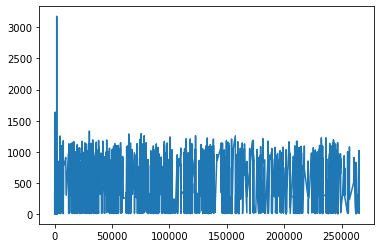

In [26]:
new_df.amt.plot(kind='line')

In [27]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [28]:
l,u = outlier_treatment(new_df['amt'])
print(l,u)

new_df = new_df[((new_df['amt'] > l ) & (new_df['amt'] < u))]
new_df

-588.545 1032.135


,merchant,category,amt,gender,state,job,is_fraud
0,680.0,8.0,4.97,0.0,27.0,397.0,0
0,680.0,8.0,4.97,0.0,27.0,32.0,0
0,115.0,8.0,4.97,0.0,27.0,397.0,0
0,115.0,8.0,4.97,0.0,27.0,32.0,0
1,432.0,4.0,107.23,0.0,47.0,439.0,0
...,...,...,...,...,...,...,...
265155,339.0,8.0,808.21,0.0,22.0,283.0,1
265157,265.0,9.0,899.10,0.0,22.0,283.0,1
265157,150.0,9.0,899.10,0.0,22.0,283.0,1
265173,559.0,2.0,10.79,0.0,22.0,283.0,1


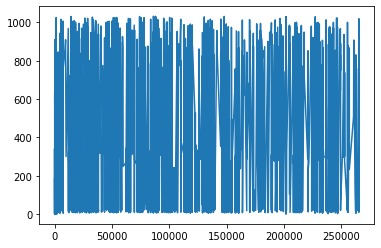

In [29]:
new_df.amt.plot(kind='line')

In [30]:
new_df = new_df.reset_index(drop=True)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


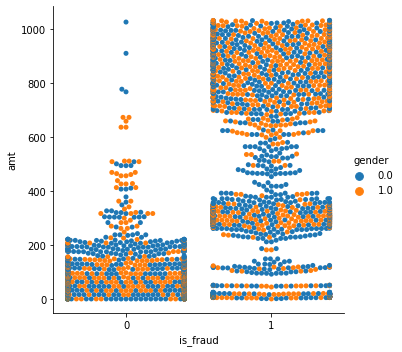

In [31]:
sns.catplot(data=new_df, x="is_fraud", y="amt", hue="gender", kind="swarm")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


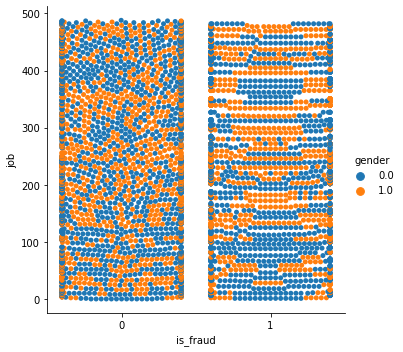

In [32]:
sns.catplot(data=new_df, x="is_fraud", y="job", hue="gender", kind="swarm")

In [33]:
new_df.describe()

,merchant,category,amt,gender,state,job,is_fraud
count,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000
mean,421.764421,6.535466,252.832639,0.448053,25.995314,246.544191,0.477945
std,237.404692,3.808639,327.046613,0.497334,14.428719,142.328464,0.499554
min,0.000000,0.000000,1.030000,0.000000,0.000000,0.000000,0.000000
25%,225.000000,4.000000,18.400000,0.000000,14.000000,129.000000,0.000000
50%,432.000000,6.000000,74.850000,0.000000,27.000000,233.000000,0.000000
75%,624.000000,10.000000,326.970000,1.000000,38.000000,380.000000,1.000000
max,836.000000,13.000000,1031.720000,1.000000,50.000000,488.000000,1.000000


In [34]:
# female
data_female = new_df.loc[new_df['gender'] == 0.0]

# male
data_male = new_df.loc[new_df['gender'] == 1.0]

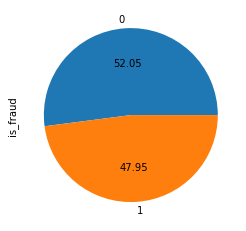

In [35]:
data_female['is_fraud'].value_counts().plot.pie(autopct='%.2f')

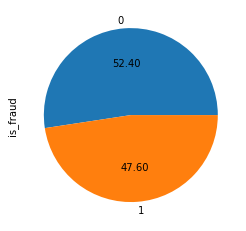

In [36]:
data_male['is_fraud'].value_counts().plot.pie(autopct='%.2f')

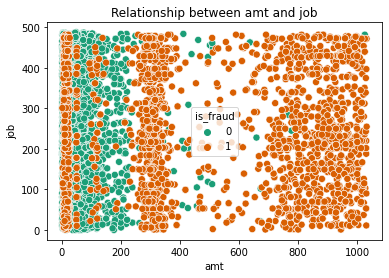

In [37]:
sns.scatterplot(x="amt", y="job", hue="is_fraud", data=new_df, palette="Dark2", s=50)
plt.title("Relationship between amt and job")
plt.show()

Text(0.5, 0, 'State')

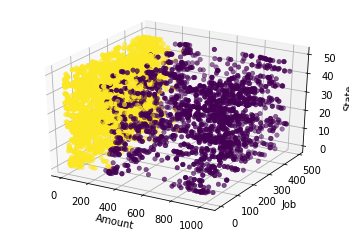

In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig_3d = plt.figure()
ax = plt.axes(projection='3d')
# ax = plt.axes(projection='3d')
ax.scatter(new_df.amt, new_df.job, new_df.state, c=new_df.amt<new_df.amt.mean(), cmap='viridis', linewidth=0.5);
# ax.scatter(new_df.amt, new_df.job, new_df.state, c=new_df.gender, cmap='viridis', linewidth=0.5);
# ax.scatter(new_df.amt, new_df.job, new_df.state, c=new_df.is_fraud, cmap='viridis', linewidth=0.5);
# ax.scatter(new_df.amt, new_df.job, new_df.is_fraud, c=new_df.state, cmap='viridis', linewidth=0.5);
ax.set_xlabel('Amount')
ax.set_ylabel('Job')
ax.set_zlabel('State')

Text(0.5, 0, 'State')

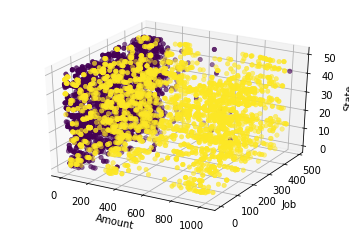

In [76]:
fig_3d = plt.figure()
ax = plt.axes(projection='3d')
# ax = plt.axes(projection='3d')
ax.scatter(new_df.amt, new_df.job, new_df.state, c=new_df.is_fraud, cmap='viridis', linewidth=0.5);
# ax.scatter(new_df.amt, new_df.job, new_df.state, c=new_df.gender, cmap='viridis', linewidth=0.5);
# ax.scatter(new_df.amt, new_df.job, new_df.state, c=new_df.is_fraud, cmap='viridis', linewidth=0.5);
# ax.scatter(new_df.amt, new_df.job, new_df.is_fraud, c=new_df.state, cmap='viridis', linewidth=0.5);
ax.set_xlabel('Amount')
ax.set_ylabel('Job')
ax.set_zlabel('State')

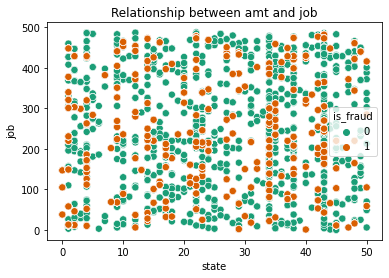

In [78]:
sns.scatterplot(x="state", y="job", hue="is_fraud", data=new_df, palette="Dark2", s=50)
plt.title("Relationship between amt and job")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


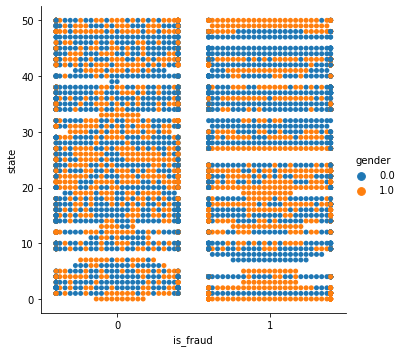

In [40]:
sns.catplot(data=new_df, x="is_fraud", y="state", hue="gender", kind="swarm")

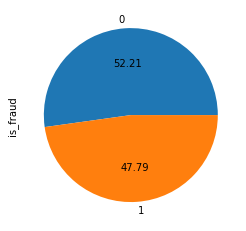

In [41]:
new_df['is_fraud'].value_counts().plot.pie(autopct='%.2f')

## Stratified K-Fold dan Metode Klasifikasi

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import matplotlib.pyplot as plt

### Memisahkan X dan y

In [43]:
X=new_df.iloc[:,:-1]
y=new_df[['is_fraud']]

In [44]:
X.isnull().any()

merchant    False
category    False
amt         False
gender      False
state       False
job         False
dtype: bool

In [45]:
y.isnull().any()

is_fraud    False
dtype: bool

In [46]:
X.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6189 entries, 0 to 6188
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   merchant  6189 non-null   float64
 1   category  6189 non-null   float64
 2   amt       6189 non-null   float64
 3   gender    6189 non-null   float64
 4   state     6189 non-null   float64
 5   job       6189 non-null   float64
dtypes: float64(6)
memory usage: 290.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6189 entries, 0 to 6188
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   is_fraud  6189 non-null   int64
dtypes: int64(1)
memory usage: 48.5 KB


(None, None)

### Metode Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

TRAIN: [ 647  648  649 ... 6186 6187 6188] TEST: [   0    1    2 ... 3819 3820 3821]
Accuracy: 0.9378029079159935, Precision: [0.92664671 0.95087719], Recall: [0.95672334 0.91708968]


TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [ 647  648  649 ... 4411 4412 4413]
Accuracy: 0.9434571890145396, Precision: [0.9272997  0.96276596], Recall: [0.96749226 0.91722973]


TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [1293 1294 1295 ... 5003 5004 5005]
Accuracy: 0.9232633279483037, Precision: [0.91180867 0.93673111], Recall: [0.94427245 0.90033784]


TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [1939 1940 1941 ... 5595 5596 5597]
Accuracy: 0.9264943457189014, Precision: [0.944    0.908646], Recall: [0.91331269 0.94087838]


TRAIN: [   0    1    2 ... 5595 5596 5597] TEST: [2585 2586 2587 ... 6186 6187 6188]
Accuracy: 0.9240097008892482, Precision: [0.95695364 0.89257504], Recall: [0.89473684 0.95600677]


Accuracy:
[0.9378029079159935, 0.9434571890145396, 0.9232633279483037, 0.926494

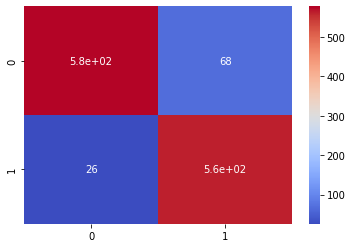

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

clf_dt = tree.DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=5)
# skf = StratifiedKFold(n_splits=5)

accs, precs, recs = [], [], []

for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # print(X_train.shape, y_train.shape)
  # print(X_test.shape, y_test.shape)  
  
  clf_dt.fit(X_train, y_train)
  pred = clf_dt.predict(X_test)
  acc = accuracy_score(y_test, pred)
  prec = precision_score(y_test, pred, average=None)
  rec = recall_score(y_test, pred, average=None)
  accs.append(acc)
  precs.append(prec)
  recs.append(rec)
  print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}')
  print('\n')


print("Accuracy:")
print(accs)
print(confusion_matrix(y_test,pred))
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,cmap='coolwarm')

In [49]:
print(f'Mean Accuracy: {np.mean(accs)}, Mean Precision: {np.mean(precs)}, Mean Recall: {np.mean(recs)}')

Mean Accuracy: 0.9310054942973972, Mean Precision: 0.9318304022283233, Mean Recall: 0.9308079972617838


### Metode K-Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

TRAIN: [ 647  648  649 ... 6186 6187 6188] TEST: [   0    1    2 ... 3819 3820 3821]
Accuracy: 0.8376413570274637, Precision: [0.79036458 0.91489362], Recall: [0.9381762  0.72758037]


TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [ 647  648  649 ... 4411 4412 4413]
Accuracy: 0.8659127625201939, Precision: [0.81914894 0.9382716 ], Recall: [0.95356037 0.77027027]


TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [1293 1294 1295 ... 5003 5004 5005]
Accuracy: 0.8206785137318255, Precision: [0.7630273  0.92824074], Recall: [0.95201238 0.67736486]


TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [1939 1940 1941 ... 5595 5596 5597]
Accuracy: 0.8231017770597738, Precision: [0.78203435 0.88773389], Recall: [0.91640867 0.72128378]


TRAIN: [   0    1    2 ... 5595 5596 5597] TEST: [2585 2586 2587 ... 6186 6187 6188]


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Accuracy: 0.8464025869037995, Precision: [0.81491713 0.89083821], Recall: [0.91331269 0.77326565]


Accuracy:
[0.8376413570274637, 0.8659127625201939, 0.8206785137318255, 0.8231017770597738, 0.8464025869037995]
[[590  56]
 [134 457]]


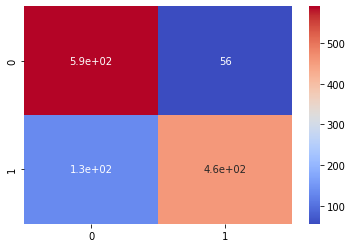

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns



clf_knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski')
skf = StratifiedKFold(n_splits=5)
# skf = StratifiedKFold(n_splits=5)

accs, precs, recs = [], [], []

for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # print(X_train.shape, y_train.shape)
  # print(X_test.shape, y_test.shape)  
  
  clf_knn.fit(X_train, y_train)
  pred = clf_knn.predict(X_test)
  acc = accuracy_score(y_test, pred)
  prec = precision_score(y_test, pred, average=None)
  rec = recall_score(y_test, pred, average=None)
  accs.append(acc)
  precs.append(prec)
  recs.append(rec)
  

  
  print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}')
  print('\n')


print("Accuracy:")
print(accs)
print(confusion_matrix(y_test,pred))
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,cmap='coolwarm')

In [52]:
print(f'Mean Accuracy: {np.mean(accs)}, Mean Precision: {np.mean(precs)}, Mean Recall: {np.mean(recs)}')

Mean Accuracy: 0.8387473994486113, Mean Precision: 0.8529470345025624, Mean Recall: 0.8343235258090808


### Metode DNN

In [53]:
import math


def n_neuron(i,o):
  # print(i)
  a=i*(2/3)
  
  frac, whole = math.modf(a)

  # print(frac, whole)

  if(frac!=0.0):
    # print("sini bang")

    if(frac>=0.5):
      # print('langit-langit bang')
      return math.ceil(a)+o
      # print(math.ceil(a)+o)
    
    else:
      # print('lantai bang')
      return whole+o
      # print(whole+o)

  else:
    # print("apa ini")
    return whole+o
    # print(whole+o)

# n_neuron(19,3)

In [54]:
#proses selanjutnya yaitu melakukan one hot encoding terhadap y.
#One hot encoding adalah proses untuk mengubah kelas integer menjadi nilai biner
#contohnya jika kita memiliki 3 kelas, yaitu 1, 2 dan 3
#maka untuk 1 akan menjadi 1 0 0
#lalu untuk 2 akan menjadi 0 1 0
#dan untuk 3 akan menjadi  0 0 1

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_new = ohe.fit_transform(y.values.reshape(-1,1)).toarray()
print(y_new)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 647  648  649 ... 6186 6187 6188] TEST: [   0    1    2 ... 3819 3820 3821]
(4951, 6) (4951, 2)
(1238, 6) (1238, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
155/155 [==============================] - 1s 3ms/step - loss: 0.7445 - accuracy: 0.4605 - val_loss: 0.6491 - val_accuracy: 0.6947
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7247 - val_loss: 0.5657 - val_

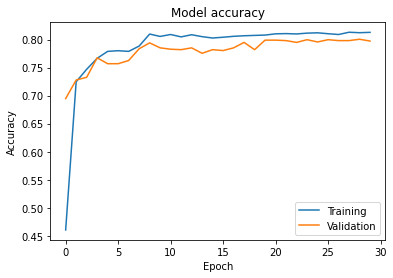

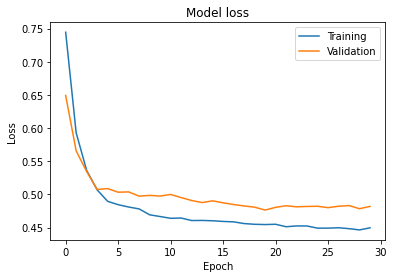

TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [ 647  648  649 ... 4411 4412 4413]
(4951, 6) (4951, 2)
(1238, 6) (1238, 2)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
155/155 [==============================] - 1s 2ms/step - loss: 0.7422 - accuracy: 0.4633 - val_loss: 0.6808 - val_accuracy: 0.6252
Epoch 2/100
155/155 [==============================] - 0s 1ms/step - loss: 0.6310 - accuracy: 0.6752 - val_loss: 0.5847 - val_accuracy: 0.7342
Epoch 3/100
155/155 [======================

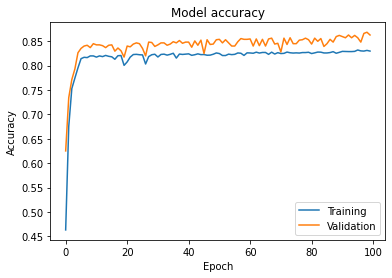

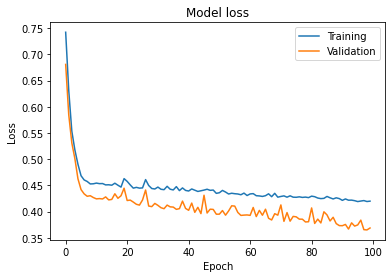

TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [1293 1294 1295 ... 5003 5004 5005]
(4951, 6) (4951, 2)
(1238, 6) (1238, 2)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 2)                 14        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
155/155 [==============================] - 1s 2ms/step - loss: 0.7222 - accuracy: 0.5649 - val_loss: 0.6185 - val_accuracy: 0.6793
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7522 - val_loss: 0.5657 - val_accuracy: 0.7302
Epoch 3/100
155/155 [======================

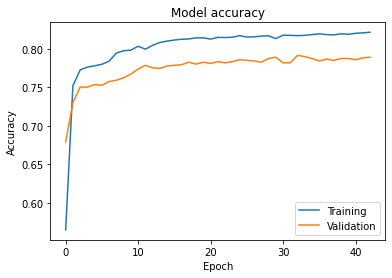

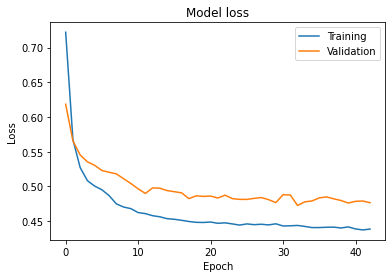

TRAIN: [   0    1    2 ... 6186 6187 6188] TEST: [1939 1940 1941 ... 5595 5596 5597]
(4951, 6) (4951, 2)
(1238, 6) (1238, 2)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 2)                 14        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
155/155 [==============================] - 1s 2ms/step - loss: 1.3859 - accuracy: 0.4809 - val_loss: 1.0580 - val_accuracy: 0.4814
Epoch 2/100
155/155 [==============================] - 0s 1ms/step - loss: 0.9515 - accuracy: 0.4813 - val_loss: 0.8498 - val_accuracy: 0.4645
Epoch 3/100
155/155 [======================

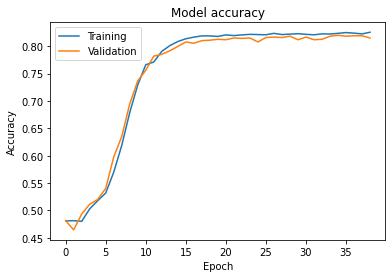

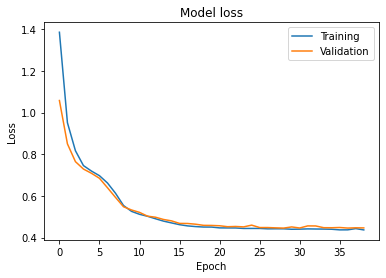

TRAIN: [   0    1    2 ... 5595 5596 5597] TEST: [2585 2586 2587 ... 6186 6187 6188]
(4952, 6) (4952, 2)
(1237, 6) (1237, 2)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 2)                 14        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
155/155 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.6690 - val_loss: 0.5260 - val_accuracy: 0.7462
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7250 - val_loss: 0.5135 - val_accuracy: 0.7607
Epoch 3/100
155/155 [======================

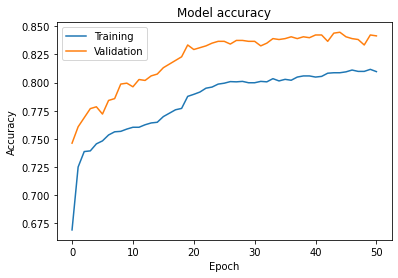

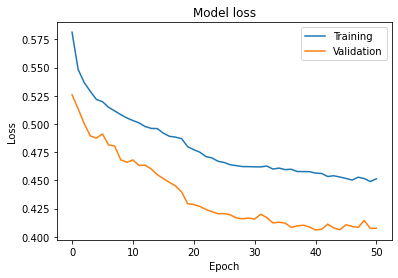

In [55]:
from keras.callbacks import EarlyStopping
import tensorflow as tf

pred = []
test = []


skf = StratifiedKFold(n_splits=5)
print(skf)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y_new[train_index], y_new[test_index]

  print(X_train.shape, y_train.shape)
  print(X_test.shape, y_test.shape)

  ### create the model

  model = Sequential()
  model.add(InputLayer(input_shape=(X_train.shape[1],))) #Input Layer
  model.add(Dense(int(n_neuron(X_train.shape[1],y_train.shape[1])), activation='tanh')) #Hidden Layer 1 
  # model.add(Dense(int(n_neuron(X_train.shape[1],y_train.shape[1])), activation='tanh')) #Hidden Layer 2
  # model.add(Dense(int(n_neuron(X_train.shape[1],y_train.shape[1])), activation='tanh')) #Hidden Layer 3
  # model.add(Dense(int(n_neuron(X_train.shape[1],y_train.shape[1])), activation='relu')) #Hidden Layer 4
  # model.add(Dense(int(n_neuron(X_train.shape[1],y_train.shape[1])), activation='relu')) #Hidden Layer 2
  model.add(Dense(y_train.shape[1], activation='softmax')) #Output Layer
  model.summary()

  # opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.000001)

  # model.compile(loss='categorical_crossentropy',
  #             optimizer=opt,
  #             metrics=['accuracy'])

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  history = model.fit(X_train, y_train,validation_data=(X_test, y_test),
                      # shuffle=True,
                    epochs=100,
                    # batch_size=30,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

  # hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=2)
  
  history_dict = history.history
  print(history_dict.keys())


  ### predict the model 

  y_pred = model.predict(X_test)
  # pred = []
  for i in range(len(y_pred)):
      pred.append(np.argmax(y_pred[i]))

  # test = []
  for i in range(len(y_test)):
      test.append(np.argmax(y_test[i]))



  ### plot the model
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'])
  plt.show()


  plt.plot(history.history['loss'],label='Training')
  plt.plot(history.history['val_loss'],label='Validation')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()


In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(test,pred) 

0.8211342704798836

In [57]:
from sklearn.metrics import classification_report

print(classification_report(test,pred))


              precision    recall  f1-score   support

           0       0.77      0.94      0.85      3231
           1       0.91      0.69      0.79      2958

    accuracy                           0.82      6189
   macro avg       0.84      0.82      0.82      6189
weighted avg       0.84      0.82      0.82      6189



In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test,pred)

array([[3031,  200],
       [ 907, 2051]])

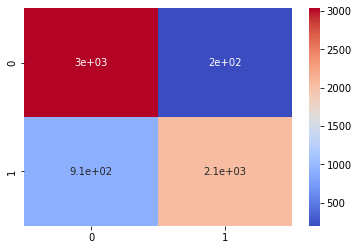

In [59]:
import seaborn as sns

cm = confusion_matrix(
  test,pred)


sns.heatmap(cm,annot=True,cmap='coolwarm')

# Data Test

## Read Data

In [60]:
df_test = pd.read_csv(path+"fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [61]:
df_test.shape

(555719, 23)

In [62]:
df_test = df_test[['merchant',	'category',	'amt',	'gender',	'state',	'job',	'is_fraud']]

In [63]:
ord_enc = OrdinalEncoder()
df_test["merchant"] = ord_enc.fit_transform(df_test["merchant"].values.reshape(-1,1))
df_test['category'] = ord_enc.fit_transform(df_test['category'].values.reshape(-1,1))
df_test['gender'] = ord_enc.fit_transform(df_test['gender'].values.reshape(-1,1))
df_test['state'] = ord_enc.fit_transform(df_test['state'].values.reshape(-1,1))
df_test['job'] = ord_enc.fit_transform(df_test['job'].values.reshape(-1,1))
df_test.head()

<ipython-input-63-6333cbb39e4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["merchant"] = ord_enc.fit_transform(df_test["merchant"].values.reshape(-1,1))


,merchant,category,amt,gender,state,job,is_fraud
0,319.0,10.0,2.86,1.0,39.0,275.0,0
1,591.0,10.0,29.84,0.0,43.0,392.0,0
2,611.0,5.0,41.28,0.0,33.0,259.0,0
3,222.0,9.0,60.05,1.0,8.0,407.0,0
4,292.0,13.0,3.19,1.0,21.0,196.0,0


In [64]:
df_test = df_test.explode("merchant")
df_test

,merchant,category,amt,gender,state,job,is_fraud
0,319.0,10.0,2.86,1.0,39.0,275.0,0
1,591.0,10.0,29.84,0.0,43.0,392.0,0
2,611.0,5.0,41.28,0.0,33.0,259.0,0
3,222.0,9.0,60.05,1.0,8.0,407.0,0
4,292.0,13.0,3.19,1.0,21.0,196.0,0
...,...,...,...,...,...,...,...
555714,507.0,5.0,43.77,1.0,23.0,460.0,0
555715,264.0,7.0,111.84,1.0,42.0,198.0,0
555716,496.0,7.0,86.88,0.0,46.0,294.0,0
555717,75.0,13.0,7.99,1.0,12.0,58.0,0


In [65]:
df_test = df_test.explode("job")
df_test

,merchant,category,amt,gender,state,job,is_fraud
0,319.0,10.0,2.86,1.0,39.0,275.0,0
1,591.0,10.0,29.84,0.0,43.0,392.0,0
2,611.0,5.0,41.28,0.0,33.0,259.0,0
3,222.0,9.0,60.05,1.0,8.0,407.0,0
4,292.0,13.0,3.19,1.0,21.0,196.0,0
...,...,...,...,...,...,...,...
555714,507.0,5.0,43.77,1.0,23.0,460.0,0
555715,264.0,7.0,111.84,1.0,42.0,198.0,0
555716,496.0,7.0,86.88,0.0,46.0,294.0,0
555717,75.0,13.0,7.99,1.0,12.0,58.0,0


In [66]:
X_tr=df_test.iloc[:,:-1]
y_tr=df_test[['is_fraud']]

## Decision Tree

In [67]:
pred_tr=clf_dt.predict(X_tr)
    
print("-"*50)
print(clf_dt.__class__.__name__)
print(classification_report(y_tr.values,pred_tr))

--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.05      0.95      0.10      2145

    accuracy                           0.93    555719
   macro avg       0.53      0.94      0.53    555719
weighted avg       1.00      0.93      0.96    555719



## KNN

In [68]:
pred_tr=clf_knn.predict(X_tr)
    
print("-"*50)
print(clf_knn.__class__.__name__)
print(classification_report(y_tr.values,pred_tr))

--------------------------------------------------
KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.03      0.77      0.07      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.84      0.51    555719
weighted avg       1.00      0.92      0.95    555719



## DNN

In [69]:
y_tr = ord_enc.fit_transform(y_tr.values.reshape(-1,1))
y_tr

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [70]:
print(X_tr.shape,y_tr.shape)

(555719, 6) (555719, 1)


In [71]:
pred_oi = []
test_oi = []

pred_tr=model.predict(X_tr)
    
print("-"*50)
print(model.predict.__class__.__name__)

for i in range(len(pred_tr)):
  pred_oi.append(np.argmax(pred_tr[i]))

for i in range(len(y_tr)):
  test_oi.append(np.argmax(y_tr[i]))

# print(len(pred_oi),len(test_oi))
print(classification_report(test_oi,pred_oi))

17367/17367 [==============================] - 13s 764us/step
--------------------------------------------------
method


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94    555719
           1       0.00      0.00      0.00         0

    accuracy                           0.89    555719
   macro avg       0.50      0.45      0.47    555719
weighted avg       1.00      0.89      0.94    555719



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
